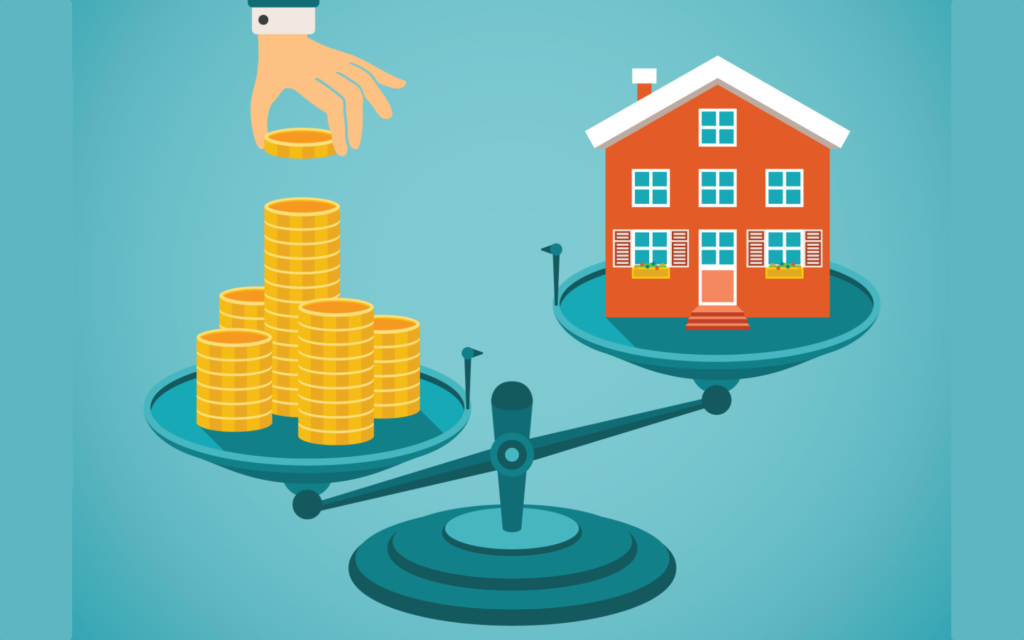

In [1]:
from IPython.display import Image
Image("D:/DS_portfolio/Cost_of_living/cost_of_living.png")

This is Kaggle dataset, where a list of cities across the world are provided with range of different costs. We will map this data on basis of different item prices across the cities.
We will use Opencage geocoder to retrieve long and lat of the cities. For map visualization will use Folium

# Exploratory Data Analysis

Importing necessary libraries for EDA 

In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np
import folium
from folium import Circle
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [3]:
#import and examine the data
COL_df = pd.read_csv('D:/DS_portfolio/Cost_of_living/cost-of-living.csv')
COL_df.head()

,Unnamed: 0,"Saint Petersburg, Russia","Istanbul, Turkey","Izmir, Turkey","Helsinki, Finland","Chisinau, Moldova","Milan, Italy","Cairo, Egypt","Banja Luka, Bosnia And Herzegovina","Baku, Azerbaijan",...,"Lviv, Ukraine","Novosibirsk, Russia","Bursa, Turkey","Brussels, Belgium","Jerusalem, Israel","Melbourne, Australia","Perth, Australia","Sydney, Australia","Alexandria, Egypt","Quito, Ecuador"
0,"Meal, Inexpensive Restaurant",7.34,4.58,3.06,12.00,4.67,15.0,3.38,3.58,5.27,...,3.75,5.72,3.82,15.0,15.56,10.22,12.43,11.81,2.81,3.59
1,"Meal for 2 People, Mid-range Restaurant, Three...",29.35,15.28,12.22,65.00,20.74,60.0,17.48,22.99,23.73,...,18.76,22.01,11.47,60.0,62.24,49.54,56.55,54.37,14.06,31.45
2,McMeal at McDonalds (or Equivalent Combo Meal),4.40,3.82,3.06,8.00,4.15,8.0,4.51,3.58,4.22,...,3.56,3.67,3.06,8.2,12.97,7.12,7.32,7.15,3.38,5.39
3,Domestic Beer (0.5 liter draught),2.20,3.06,2.29,6.50,1.04,5.0,1.69,1.02,0.84,...,1.50,1.10,2.37,4.0,7.26,5.57,5.90,4.97,1.69,1.35
4,Imported Beer (0.33 liter bottle),2.20,3.06,2.75,6.75,1.43,5.0,2.82,1.53,2.11,...,1.50,2.20,3.06,4.0,7.26,5.57,5.59,4.97,2.81,2.70


In [4]:
#we will transpose the datframe to get the cities as row 
COL_df = pd.read_csv("D:/DS_portfolio/Cost_of_living/cost-of-living.csv", index_col=[0]).T.reset_index()
COL_df = COL_df.rename(columns={'index':'location'})
COL_df.head()

,location,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),...,Lettuce (1 head),Cappuccino (regular),"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red Meat),Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car),"Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child","International Primary School, Yearly for 1 Child"
0,"Saint Petersburg, Russia",7.34,29.35,4.40,2.20,2.20,0.76,0.53,0.98,0.71,...,0.86,1.96,0.92,1.91,0.89,0.48,7.18,19305.29,411.83,5388.86
1,"Istanbul, Turkey",4.58,15.28,3.82,3.06,3.06,0.64,0.24,0.71,0.36,...,0.61,1.84,1.30,0.80,1.91,0.62,9.73,20874.72,282.94,6905.43
2,"Izmir, Turkey",3.06,12.22,3.06,2.29,2.75,0.61,0.22,0.65,0.38,...,0.57,1.56,1.31,0.70,1.78,0.58,8.61,20898.83,212.18,4948.41
3,"Helsinki, Finland",12.00,65.00,8.00,6.50,6.75,2.66,1.89,0.96,2.27,...,2.30,3.87,2.13,2.91,1.61,1.25,12.34,24402.77,351.60,1641.00
4,"Chisinau, Moldova",4.67,20.74,4.15,1.04,1.43,0.64,0.44,0.68,0.33,...,0.84,1.25,0.93,1.56,1.37,0.59,5.37,17238.13,210.52,2679.30


Longitude and Latitude with Opencage

In [5]:
from opencage.geocoder import OpenCageGeocode

key ='23c22226fe8f45a3a727b1bfbdce2a9b'

geocoder = OpenCageGeocode(key)

list_lat = [] 
list_long = []

for row in COL_df.location:
    try:
        query = str(row)
        results = geocoder.geocode(query)   
        lat = results[0]['geometry']['lat']
        long = results[0]['geometry']['lng']
        list_lat.append(lat)
        list_long.append(long)
    except:
        list_lat.append(None)
        list_long.append(None)

COL_df['lat'] = list_lat   
COL_df['lon'] = list_long

We will select columns as item to plot against the citites

In [6]:
range_cost = (COL_df.describe().loc['min',:]/COL_df.describe().loc['max',:]).sort_values().index[2:22]
list(range_cost)


['Taxi 1hour Waiting (Normal Tariff)',
 'Taxi Start (Normal Tariff)',
 'Price per Square Meter to Buy Apartment Outside of Centre',
 'Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child',
 'Monthly Pass (Regular Price)',
 'Price per Square Meter to Buy Apartment in City Centre',
 '1 min. of Prepaid Mobile Tariff Local (No Discounts or Plans)',
 'International Primary School, Yearly for 1 Child',
 'One-way Ticket (Local Transport)',
 'Average Monthly Net Salary (After Tax)',
 'Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate',
 'Loaf of Fresh White Bread (500g)',
 'Apartment (1 bedroom) Outside of Centre',
 'Taxi 1km (Normal Tariff)',
 'Apartment (3 bedrooms) Outside of Centre',
 'Tennis Court Rent (1 Hour on Weekend)',
 'Water (0.33 liter bottle) ',
 'Apartment (1 bedroom) in City Centre',
 'Cigarettes 20 Pack (Marlboro)',
 'Internet (60 Mbps or More, Unlimited Data, Cable/ADSL)']

In [36]:
def color_producer(val):
    if val <= COL_df[item].quantile(.25):
        return 'green'
    elif val <= COL_df[item].quantile(.50):
        return 'orange'
    elif val <= COL_df[item].quantile(.75):
        return 'red'
    else:
        return 'lightblue'

In [46]:
map_1 = folium.Map(location=[COL_df.lat.mean(),COL_df.lon.mean()], tiles='cartodbpositron', zoom_start=2)

item = range_cost[0]

# Add a bubble map to the base map
for i in range(0,len(COL_df)):
    Circle(
        location=[COL_df.iloc[i]['lat'], COL_df.iloc[i]['lon']],
        radius=1000,
        color=color_producer(COL_df.iloc[i][item])).add_to(map_1)

print ('Price of: ', item)
map_1

Price of:  Taxi 1hour Waiting (Normal Tariff)


In [38]:
map_2= folium.Map(location=[COL_df.lat.mean(),COL_df.lon.mean()], tiles='cartodbpositron', zoom_start=2)
item = range_cost[2]

# Add a bubble map to the base map
for i in range(0,len(COL_df)):
    Circle(
        location=[COL_df.iloc[i]['lat'], COL_df.iloc[i]['lon']],
        radius=1000,
        color=color_producer(COL_df.iloc[i][item])).add_to(map_2)

print ('Price of: ', item)
# Display the map
#e
map_2

Price of:  Price per Square Meter to Buy Apartment Outside of Centre


In [39]:
map_3= folium.Map(location=[COL_df.lat.mean(),COL_df.lon.mean()], tiles='cartodbpositron', zoom_start=2)
item = range_cost[9]

# Add a bubble map to the base map
for i in range(0,len(COL_df)):
    Circle(
        location=[COL_df.iloc[i]['lat'], COL_df.iloc[i]['lon']],
        radius=1000,
        color=color_producer(COL_df.iloc[i][item])).add_to(map_3)

print ('Price of: ', item)
# Display the map
#e
map_3

Price of:  Average Monthly Net Salary (After Tax)


In [40]:
map_4= folium.Map(location=[COL_df.lat.mean(),COL_df.lon.mean()], tiles='cartodbpositron', zoom_start=2)
item = range_cost[10]

# Add a bubble map to the base map
for i in range(0,len(COL_df)):
    Circle(
        location=[COL_df.iloc[i]['lat'], COL_df.iloc[i]['lon']],
        radius=1000,
        color=color_producer(COL_df.iloc[i][item])).add_to(map_4)

print ('Price of: ', item)
# Display the map
#e
map_4

Price of:  Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate


In [41]:
map_5= folium.Map(location=[COL_df.lat.mean(),COL_df.lon.mean()], tiles='cartodbpositron', zoom_start=2)
item = range_cost[14]

# Add a bubble map to the base map
for i in range(0,len(COL_df)):
    Circle(
        location=[COL_df.iloc[i]['lat'], COL_df.iloc[i]['lon']],
        radius=1000,
        color=color_producer(COL_df.iloc[i][item])).add_to(map_5)

print ('Price of: ', item)
# Display the map
#e
map_5

Price of:  Apartment (3 bedrooms) Outside of Centre


In [42]:
map_6= folium.Map(location=[COL_df.lat.mean(),COL_df.lon.mean()], tiles='cartodbpositron', zoom_start=2)
item = range_cost[-1]

# Add a bubble map to the base map
for i in range(0,len(COL_df)):
    Circle(
        location=[COL_df.iloc[i]['lat'], COL_df.iloc[i]['lon']],
        radius=1000,
        color=color_producer(COL_df.iloc[i][item])).add_to(map_6)

print ('Price of: ', item)
# Display the map
#e
map_6

Price of:  Internet (60 Mbps or More, Unlimited Data, Cable/ADSL)


In [43]:
map_7= folium.Map(location=[COL_df.lat.mean(),COL_df.lon.mean()], tiles='cartodbpositron', zoom_start=2)
item = range_cost[-3]

# Add a bubble map to the base map
for i in range(0,len(COL_df)):
    Circle(
        location=[COL_df.iloc[i]['lat'], COL_df.iloc[i]['lon']],
        radius=1000,
        color=color_producer(COL_df.iloc[i][item])).add_to(map_7)

print ('Price of: ', item)
# Display the map
#e
map_7

Price of:  Apartment (1 bedroom) in City Centre


In [44]:
map_8= folium.Map(location=[COL_df.lat.mean(),COL_df.lon.mean()], tiles='cartodbpositron', zoom_start=2)
item = range_cost[-4]

# Add a bubble map to the base map
for i in range(0,len(COL_df)):
    Circle(
        location=[COL_df.iloc[i]['lat'], COL_df.iloc[i]['lon']],
        radius=1000,
        color=color_producer(COL_df.iloc[i][item])).add_to(map_8)

print ('Price of: ', item)
# Display the map
#e
map_8

Price of:  Water (0.33 liter bottle) 
